#### **Exercise 1:**
Create a function returning the first N terms of the tailor series of the function without using the sympy series function.

In [1]:
import sympy as sp

In [2]:
def my_tailor(f,N):
    x0 = sp.symbols('x0')
    result = f.subs(x, x0)
    f_diff = f.diff()
    div = 1
    for i in range(0, N):
        result = result + f_diff.subs(x, x0)*(x-x0)**(i+1) / div
        div = div * (i+2)
        f_diff = f_diff.diff()
    
    return(result + sp.O((x-x0)**N))
    #return result

I'm not even sure the next line will work for every version as it was hard to find it:). Sympy stores the terms not in the order in which it was created, but in some other order, so by default it's too hard to compare outputs. This option allows to reverse the printing order.

In [3]:
sp.init_printing(order='rev-lex')

In [4]:
x,x0=sp.symbols('x x0')
my_f=x**2+sp.sin(x)*sp.cos(x)+4*x**3
#my_f=x**4+x**3+x**2
my_tailor(my_f,3)

In [5]:
my_f.series(x,x0,n=4)

#### **Exercise 2:**
Write a matrix multiplication function using lists ("manually", using the matrix multiplication formula) and another one using numpy arrays (call matmul function). Time them both.

In [6]:
import numpy as np

In [7]:
#this is C-style, seems like the easiest to code
def my_mult(m1,m2,N):
    m3=[0 for i in range(N*N)]
    for i in range(N):
        for j in range(N):
            for k in range(N):
                m3[i*N+j]=m3[i*N+j]+m1[i*N+k]*m2[k*N+j]
    return m3

In [8]:
#this is with double index
#for simplicity I work with square matrices only
def my_mult2(A, B):
    N = len(A[0])
    # Initialize result matrix with zeros
    result =  [[0 for _ in range(N)] for _ in range(N)]
    # Perform matrix multiplication
    for i in range(N):
        for j in range(N):
            for k in range(N):
                result[i][j] += A[i][k] * B[k][j]
    
    return result

In [9]:
N=2

In [10]:
#1D lists
matr1=list(range(N*N))
matr2=list(range(N*N))
#2D lists
matr3 = [matr1[i * N:(i + 1) * N] for i in range(N)]
matr4 = [matr2[i * N:(i + 1) * N] for i in range(N)]
#numpy matrices
nmatr1=np.arange(N*N).reshape(N,N)
nmatr2=np.arange(N*N).reshape(N,N)

In [11]:
%%timeit
res1=my_mult(matr1,matr2,N)

1.98 μs ± 34.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [12]:
%%timeit
res_np=np.matmul(nmatr1,nmatr2)

1.28 μs ± 94.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [13]:
%%timeit
res2=my_mult2(matr3,matr4)

1.8 μs ± 51.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


make sure you test on a bigger matrix!

**We need to test our functions!**

In [14]:
def compare_matrices(matrix_2d_list, matrix_1d_list, matrix_numpy):
    N = len(matrix_2d_list)  
    
    # Convert 2D list to a 1D list for easy comparison
    flattened_list = [elem for row in matrix_2d_list for elem in row]

    # Flatten the NumPy array
    flattened_numpy = matrix_numpy.flatten().tolist()

    # Compare all three
    if flattened_list == matrix_1d_list == flattened_numpy:
        print("All matrices are identical!")
    else:
        print("Matrices are different!")

In [15]:
#surprise! if you had them in "timeit" cell, they don't exist
#so we just recalculate
res1=my_mult(matr1,matr2,N)
res_np=np.matmul(nmatr1,nmatr2)
res2=my_mult2(matr3,matr4)
compare_matrices(res2,res1,res_np)

All matrices are identical!


#### **Execrise 3:**

Consider the following example. Change functions in it to plot something different from `sin` in each panel. Add x and y labels to each panel. Experiment till this looks nice enough for an article. Save the output. 

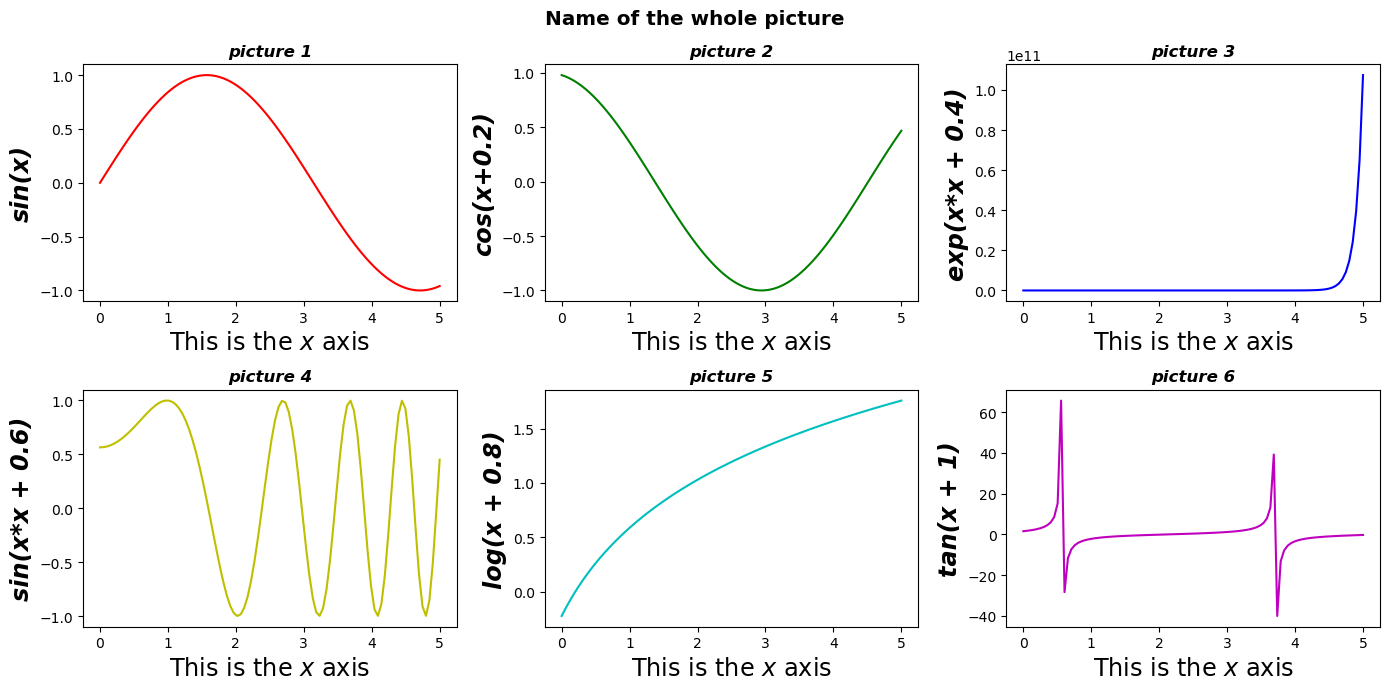

In [16]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0,5,100)
y1 = np.sin(x)
y2 = np.cos(x + 0.2)
y3 = np.exp(x*x + 0.4)
y4 = np.sin(x*x + 0.6)
y5 = np.log(x + 0.8)
y6 = np.tan(x + 1)

# now we decide the actual figure size in inches
fig = plt.figure(figsize=(14,7))

plt.suptitle('Name of the whole picture',fontweight='bold', fontsize='x-large')
plt.subplots_adjust(hspace=0.3, top=0.8) 
# create subplots 231 means make a 2x3 grid and this is the first plot
plt.subplot(231)
#these are here to show that you can do the same here as for a single plot
plt.title('picture 1',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('sin(x)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('This is the $x$ axis',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y1,color='r')

plt.subplot(232)
plt.title('picture 2',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('cos(x+0.2)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('This is the $x$ axis',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y2,color='g')

plt.subplot(233)
plt.title('picture 3',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('exp(x*x + 0.4)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('This is the $x$ axis',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y3,color='b')

plt.subplot(234)
plt.title('picture 4',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('sin(x*x + 0.6)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('This is the $x$ axis',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y4,color='y')

plt.subplot(235)
plt.title('picture 5',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('log(x + 0.8)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('This is the $x$ axis',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y5,color='c')

plt.subplot(236)
plt.title('picture 6',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('tan(x + 1)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('This is the $x$ axis',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y6,color='m')
# removed extra white space
plt.tight_layout()
#plt.show()

#### **Exercise 4:**
Plot the recaman sequence in the following way:

Add a semi-circular arc from $a_{n}$ to $a_{n-1}$.

Alternate the arcs to be above and below the x-axis according to whether
    n is even or odd.

In [17]:
from matplotlib import pyplot as plt
import numpy as np

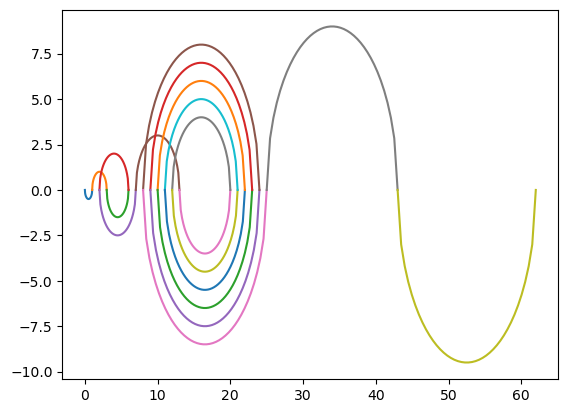

In [18]:
def recaman(max_terms):
    seq=np.empty(max_terms)
    exist = set([])
    n = 0 
    a = 0
    while n < max_terms:
        diff=a-n
        if diff > 0 and diff not in exist:
            a = diff
        else:
            a = a + n
        seq[n]=a
        exist.add(a)
        n += 1
    return seq
seq = recaman(20)
for i in range(1, len(seq)):
    h = (seq[i] + seq[i-1])/2
    r = abs((seq[i] - seq[i-1]))/2
    x = np.linspace(seq[i], seq[i-1], 40)
    y = (-1)**i * np.sqrt(r**2 - (x-h)**2)
    plt.plot(x, y)

#### **Exercise5:**

Plot a rainbow. Use your imagination and google to make it beautiful.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from matplotlib.cm import get_cmap
import matplotlib.patches as patches

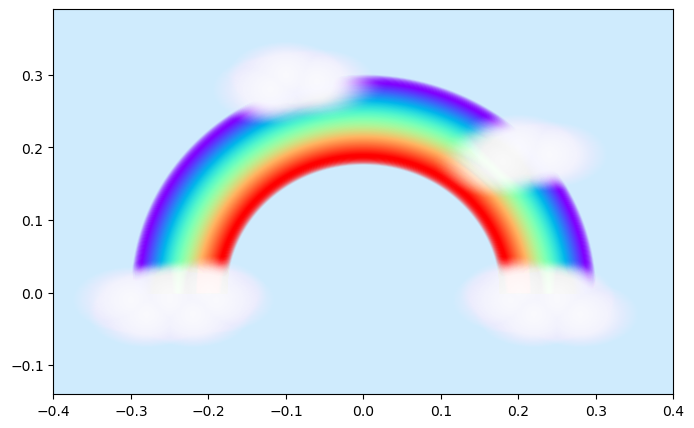

In [20]:
def draw_cloud(center):
    
    radius = 0.005
    num_ellipses = 100
    alpha = 0.15

    for i in range(100):
        ellipse = patches.Ellipse(center, radius * (0.8 + i * 0.01), radius, color='white', alpha=alpha, zorder=100 - i)
        ax.add_patch(ellipse)
        radius += 0.001
        alpha -= 0.0015
        
cmap = plt.get_cmap('rainbow', 100)
fig, ax = plt.subplots(figsize=(8,5)) 
theta = np.linspace(0, np.pi, 100)
radius = 0.3  
al=0.0
for i in range (10):
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    plt.plot(x, y, color=cmap(0),alpha=al)
    radius-=0.0012
    al+=0.1
for i in range (100):
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    plt.plot(x, y, color=cmap(i))
    radius-=0.001
al=1
for i in range (10):
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    plt.plot(x, y, color=cmap(100),alpha=al)
    radius-=0.0012
    al-=0.1
    
draw_cloud((-0.2,0))
draw_cloud((-0.19,-0.01))
draw_cloud((-0.25,-0.005))
draw_cloud((-0.25,-0.01))
draw_cloud((-0.30,-0.01))
draw_cloud((-0.28,-0.03))
draw_cloud((-0.22,-0.03))

draw_cloud((0.2,0))
draw_cloud((0.19,-0.01))
draw_cloud((0.25,-0.005))
draw_cloud((0.25,-0.01))
draw_cloud((0.28,-0.03))
draw_cloud((0.22,-0.03))

draw_cloud((-0.1,0.3))
draw_cloud((-0.12,0.28))
draw_cloud((-0.06,0.29))

draw_cloud((-0.1+0.3,0.3-0.1))
draw_cloud((-0.12+0.3,0.28-0.1))
draw_cloud((-0.06+0.3,0.29-0.1))

ax.axhspan(-0.15,0.4, facecolor='lightskyblue', alpha=0.4)  # Blue for y >= 0
plt.ylim([-0.14,0.39])
plt.xlim([-0.4,0.4])
plt.show()

#### **Exercise6**

Plot a nice-looking 3-D torus. Do this 3 times with different styles. 

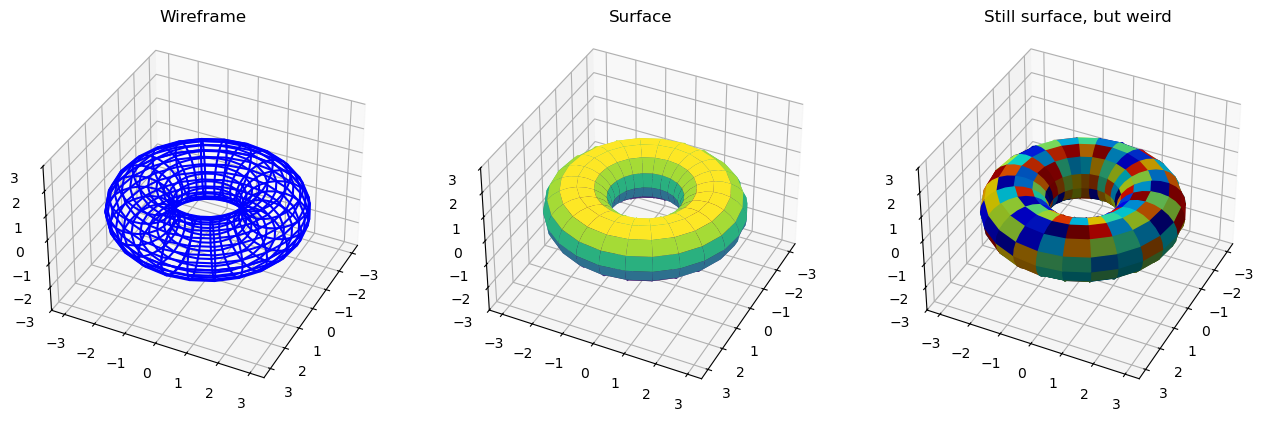

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Function to generate 3D torus coordinates
def generate_torus(R, r, theta, phi):
    x = (R + r * np.cos(phi)) * np.cos(theta)
    y = (R + r * np.cos(phi)) * np.sin(theta)
    z = r * np.sin(phi)
    return x, y, z

# Torus parameters
n_plot_points=25
R = 2  # Major radius
r = 1  # Minor radius
theta = np.linspace(0, 2 * np.pi, n_plot_points)
phi = np.linspace(0, 2 * np.pi, n_plot_points)
theta, phi = np.meshgrid(theta, phi)

# Style 1: Wireframe
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(131, projection='3d')
x, y, z = generate_torus(R, r, theta, phi)
ax.set_zlim(-3,3)
ax.view_init(36, 26)
ax.plot_wireframe(x,y,z, color="#0000FF")

ax.set_title('Wireframe')

# Style 2: Surface
ax = fig.add_subplot(132, projection='3d')
x, y, z = generate_torus(R, r, theta, phi)
ax.set_zlim(-3,3)
ax.view_init(37, 26)
my_col = cm.jet(np.random.rand(z.shape[0],z.shape[1]))
# available colormaps are here -  https://matplotlib.org/stable/tutorials/colors/colormaps.html
ax.plot_surface(x,y,z,rstride=2,cstride=1,cmap='viridis')
ax.set_title('Surface')

# Style 3: used the same, but changed colormap
ax = fig.add_subplot(133, projection='3d')
x, y, z = generate_torus(R, r, theta, phi)
ax.set_zlim(-3,3)
ax.view_init(37, 26)
#example of how to contol colormaps with weird stuff
my_col = cm.jet(np.random.rand(z.shape[0],z.shape[1]))
ax.plot_surface(x,y,z,rstride=2,cstride=1,facecolors = my_col)
ax.set_title('Still surface, but weird')

plt.show()

#### **Exercise 7:**

Repeat the curve fitting example with the following modifications:

 - choose some other function
 - first write the data to a file, then read it (with numpy, for example)
 - produce the picture that has axes, name and legend

[1.12792652 0.75324557]


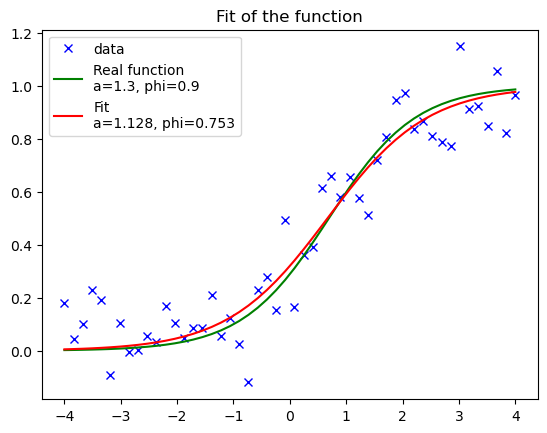

In [22]:
from scipy import optimize

np.random.seed(0)

# Let's generate fake data that we can "fit" then 
def f(x, a, phi):
    # return np.cos(a * x + phi)
    return 1 / (1 + np.exp(-a * x + phi))

#random makes it look like experimental data
x = np.linspace(-4, 4, 50)
y_save = f(x, 1.3, 0.9) + .1*np.random.normal(size=50)

# Save to file
np.savetxt('mydata.txt', np.column_stack((x,y_save)))

# Read from file 
loaded = np.genfromtxt('mydata.txt')
x=loaded[:,0]
y=loaded[:,1]

# Now fit the model: the parameters omega and phi can be found in the
# `params` vector
params, params_cov = optimize.curve_fit(f, x, y)

print(params)

# plot the data and the fitted curve
plt.plot(x, y, 'bx', label='data')
plt.plot(x,f(x,1.3,0.9),'g-',label='Real function\na=1.3, phi=0.9')
plt.plot(x, f(x, *params), 'r-', label=f'Fit\na={params[0]:.3f}, phi={params[1]:.3f}')
plt.legend()
plt.title('Fit of the function')
plt.show()

#### **Exercise 8:**

Integrate the function `x**2 + 10*np.sin(x)` on the interval `[-10,10]`.
Find a way to make a plot like in textbooks where you color the area under the curve that you integrate.
Now integrate the same function symbolically using `sympy`, then put borders into it and compare the results.

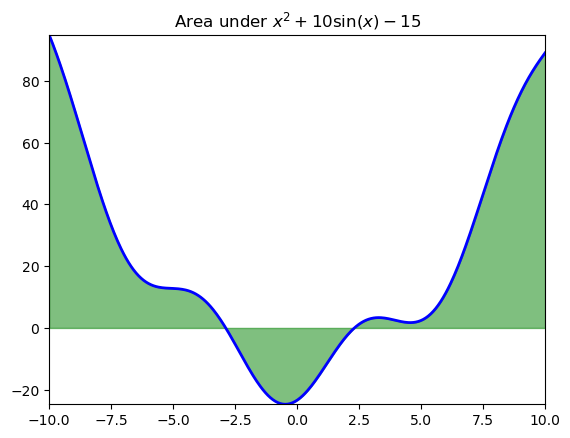

Numerical integration result: 375.82222626539397
result from sympy
10*cos(11) - 10*cos(9) + 1100/3
375.82222626539397


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

#I changed it a little bit
def f(x):
    return x**2 + 10*np.sin(x-1) - 15

#here the second value returned is an error that we now don't care about
#the underscore is often used in python as a "throwaway variable"
result, _ = quad(f, -10, 10)

x = np.linspace(-10, 10, 400)
y = f(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'blue', linewidth=2)
ax.fill_between(x, y, color='green', alpha=0.5)
ax.set_xlim([-10, 10])
ax.set_ylim([min(y), max(y)])
ax.set_title("Area under $x^2 + 10 \\sin(x) -15$")
plt.show()

print("Numerical integration result:", result)

import sympy as sp
x = sp.symbols('x')
# this becomes symbolic function
f = x**2 + 10*sp.sin(x-1)-15
I = sp.integrate(f, (x, -10, 10))
print("result from sympy")
print(I)
print(float(I))


#### Exercise Decorator.1:

Create a decorator that checks if the passed array is empty and only calls the function if it's not.


In [24]:
import functools
def check_empty(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        if any(arg == [] for arg in args) or any(value == [] for value in kwargs.values()):
            print("I don't work with empty arrays")
        else:
            return func(*args, **kwargs)
    return wrapper

@check_empty
def print_array(arr):
    '''I print arrays'''
    print(arr)

@check_empty
def print_multiple_arrays(arr1, arr2, arr3=[1]):
    '''I print multiple arrays'''
    print(arr1, arr2, arr3)


l=[1,2,3]
m=[]
print("passing an ok array:")
print_array(l)
print("passing a non-ok array:")
print_array(m)
print("passing 2 ok arrays:")
print_multiple_arrays(l, l)  
print("passing non-ok arrays:")
print_multiple_arrays(l, m)  
print_multiple_arrays(l, l, arr3=[])

passing an ok array:
[1, 2, 3]
passing a non-ok array:
I don't work with empty arrays
passing 2 ok arrays:
[1, 2, 3] [1, 2, 3] [1]
passing non-ok arrays:
I don't work with empty arrays
I don't work with empty arrays


#### Exercise Decorator.2:
Create a decorator to time a function execution time. Hint: use import time and time_point=time.time(). You can check if it's correct by timing the time.sleep function.

In [25]:
import time 

def time_decorator(func):
    def wrapper(*args, **kwargs):
        time_point = time.time()
        output = func(*args, **kwargs)
        print("Function execution time: ", time.time() - time_point)
        return output
    return wrapper
    

@time_decorator
def sleep():
    time.sleep(3)

@time_decorator
def dot_product(a, b):
    return sum([a[i]*b[i] for i in range(len(a))])


a = [1, 2, 3]
b = [4, 5, 6]
c = dot_product(a, b)

sleep()
print('Dot product: ', c)

Function execution time:  5.245208740234375e-06
Function execution time:  3.0001378059387207
Dot product:  32


#### Exercise Decorator.3:
Write a decorator that plots a function (of one variable) over the interval (0,100). Make sure your plot has a name, the axis names, nice color, changed background color and a legend.

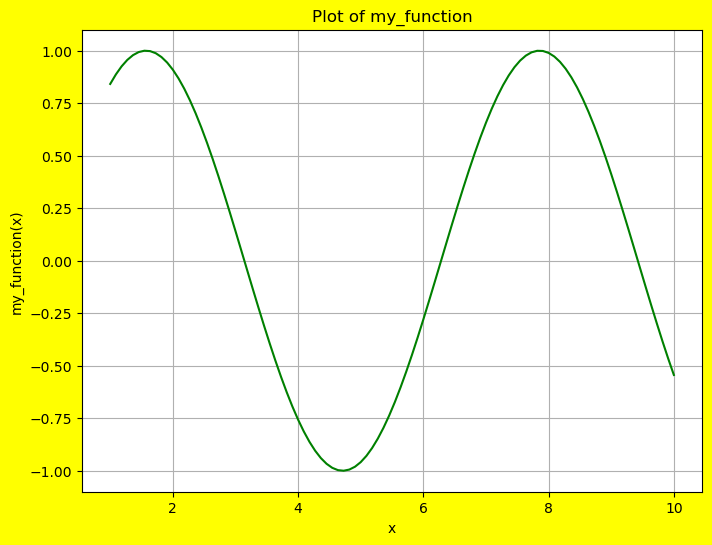

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decorator(func):
    def wrapper(*args, **kwargs):
        # Generate 100 points between 1 and 10
        x = np.linspace(1, 10, 100)
        y = func(x)

        # Plotting
        plt.figure(figsize=(8, 6), facecolor='yellow')
        plt.plot(x, y, color='green')
        plt.title(f"Plot of {func.__name__}")
        plt.xlabel('x')
        plt.ylabel(f'{func.__name__}(x)')
        plt.grid(True)
        plt.show()

        return func(*args, **kwargs)
    return wrapper

# Example usage
@plot_decorator
def my_function(x):
    return np.sin(x)

# Call the decorated function
my_function(1)
 

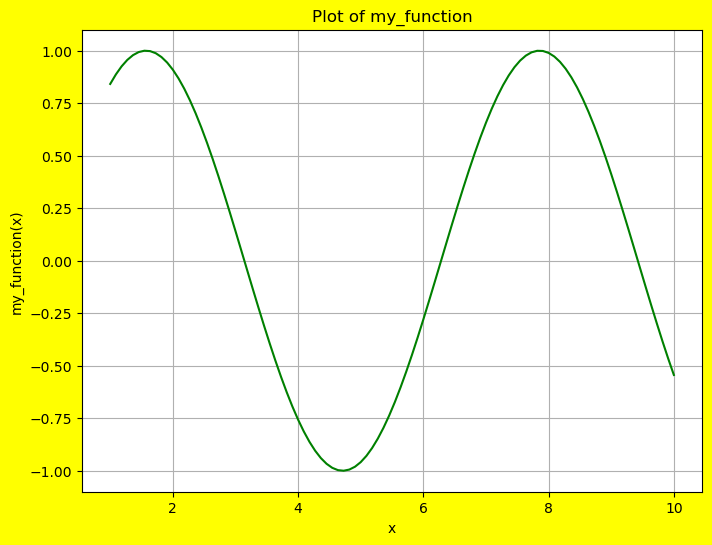

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decorator(func):
    def wrapper(*args, **kwargs):
        # Generate 100 points between 1 and 10
        x = np.linspace(1, 10, 100)
        y = func(x)

        # Create a figure and axis object
        fig, ax = plt.subplots(figsize=(8, 6))
        fig.patch.set_facecolor('yellow')  # Set the background color of the figure

        # Plotting using the ax interface
        ax.plot(x, y, color='green')
        ax.set_title(f"Plot of {func.__name__}")
        ax.set_xlabel('x')
        ax.set_ylabel(f'{func.__name__}(x)')
        ax.grid(True)

        # Display the plot
        plt.show()

        return func(*args, **kwargs)
    return wrapper

# Example usage
@plot_decorator
def my_function(x):
    return np.sin(x)

# Call the decorated function
my_function(1)
 
